In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram-play-store-reviews/instagram.csv


In [10]:
data = pd.read_csv("/kaggle/input/instagram-play-store-reviews/instagram.csv")

In [11]:
data.sample(5)

,review_description,rating,review_date
70546,Hey ! The latest update doesn't look good to m...,3,2020-10-08 15:46:32
151018,My photos seem super blurry after the update. ...,1,2019-11-05 12:17:31
21317,I'm giving one star just because of the memes....,1,2023-06-18 16:48:03
76219,What the hell is wrong with this app it's show...,1,2021-05-13 12:14:01
64422,Hi my problem is rell not yet try again .my pr...,5,2023-07-20 06:23:44


# total rows and columns 

In [12]:
print("No. of Rows : ",data.shape[0],"\nNo. of columns : ",data.shape[1])

No. of Rows :  210542 
No. of columns :  3


In [13]:
data.isnull().sum()

# NO NULL VALUES ARE FOUND 

review_description    0
rating                0
review_date           0
dtype: int64

In [14]:
data.duplicated().sum()


# NO DUPLICATE REVIEW FOUND

np.int64(0)

# Importing dependencies

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px 
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import collections
from collections import Counter 


print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.19.0


In [16]:
import re
import string
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [17]:
data['review_date'] = pd.to_datetime(data['review_date']).dt.date


In [18]:
data.head(5)

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11
1,"Used to be my favorite social media app, but ""...",2,2023-07-22
2,Instagram is the best of all the social media....,5,2023-07-25
3,"I love this app.. but as of late, I have been ...",2,2023-07-09
4,Used to be a great app but there are so many m...,3,2023-07-17


# Text Cleaning and Preprocessing 

In [19]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove accents
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    words = text.split()
    
    # Remove stopwords & short words
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Stemming
    words = [stemmer.stem(word) for word in words]
    
    return " ".join(words)

# Apply cleaning
data['clean_review'] = data['review_description'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
data.head(5)

,review_description,rating,review_date,clean_review
0,"The app is good for connecting with friends, f...",3,2023-07-11,app good connect friend famili even potenti bu...
1,"Used to be my favorite social media app, but ""...",2,2023-07-22,use favorit social media app improv made harde...
2,Instagram is the best of all the social media....,5,2023-07-25,instagram best social media post platform faci...
3,"I love this app.. but as of late, I have been ...",2,2023-07-09,love app late problem screen background turn w...
4,Used to be a great app but there are so many m...,3,2023-07-17,use great app mani bug issu ever plus ruin use...


In [21]:
val_counts = data.rating.value_counts()
fig = px.bar(data,x = val_counts.index,y = val_counts.values,text_auto = True)
fig.show()

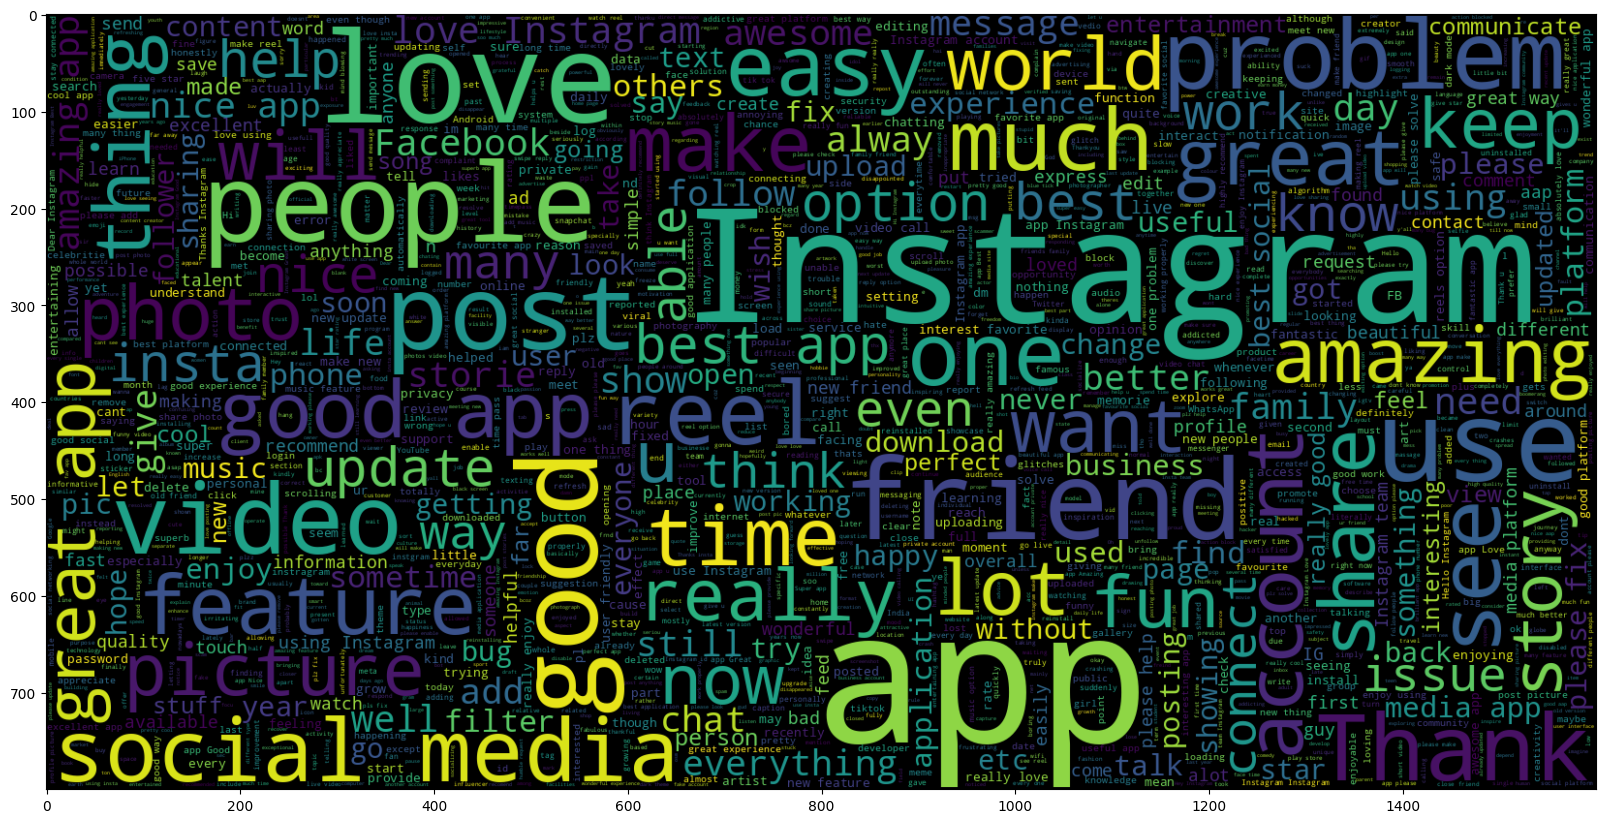

In [22]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.rating == 5].review_description))
plt.imshow(wc , interpolation = 'bilinear')


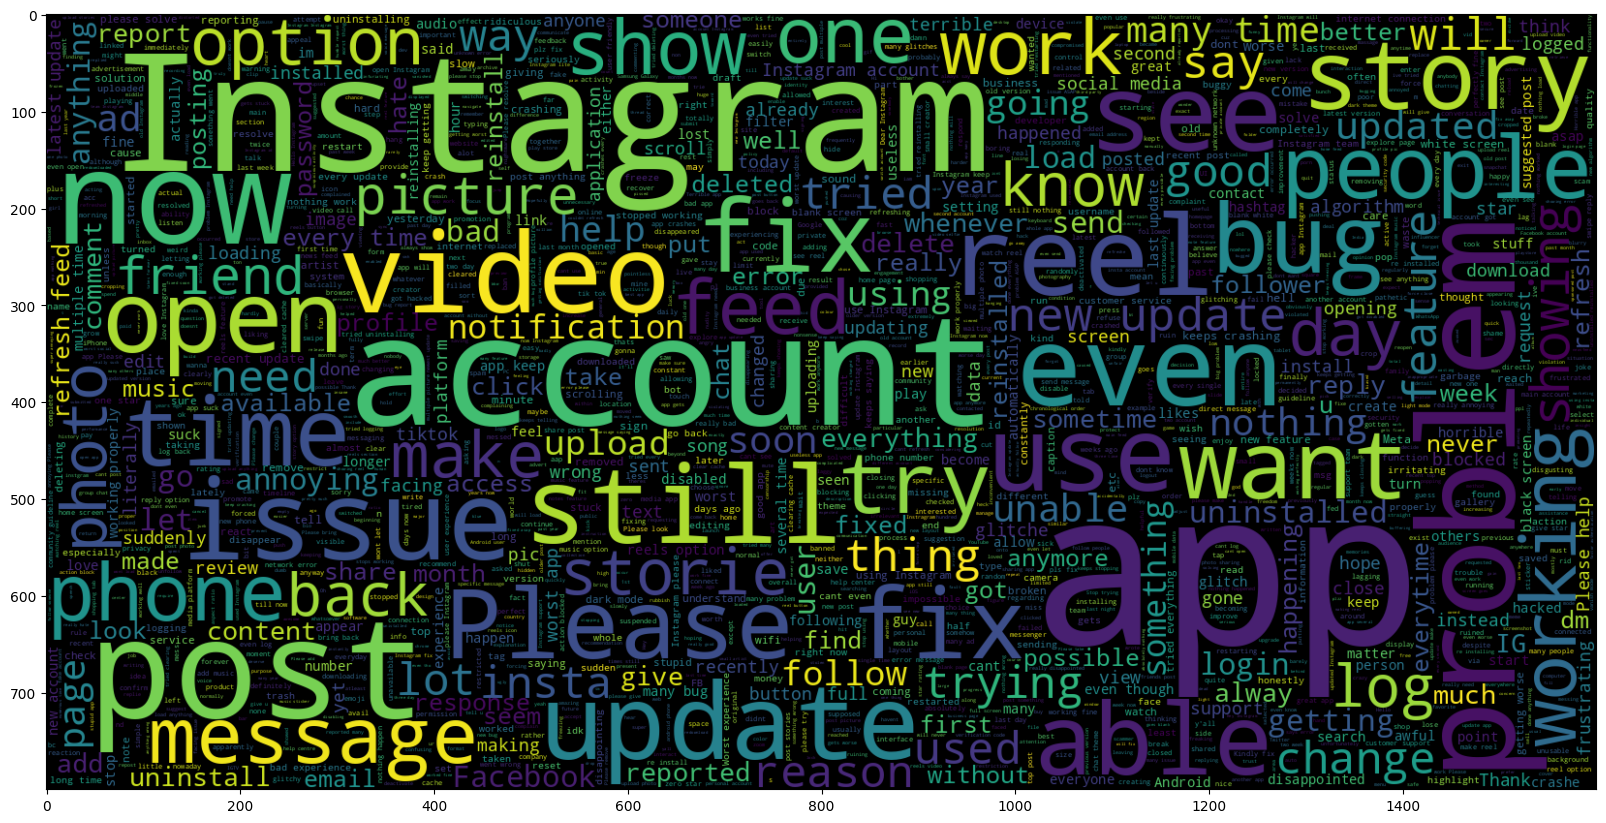

In [23]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.rating == 1].review_description))
plt.imshow(wc , interpolation = 'bilinear')

Text(0, 0.5, 'Frequency')

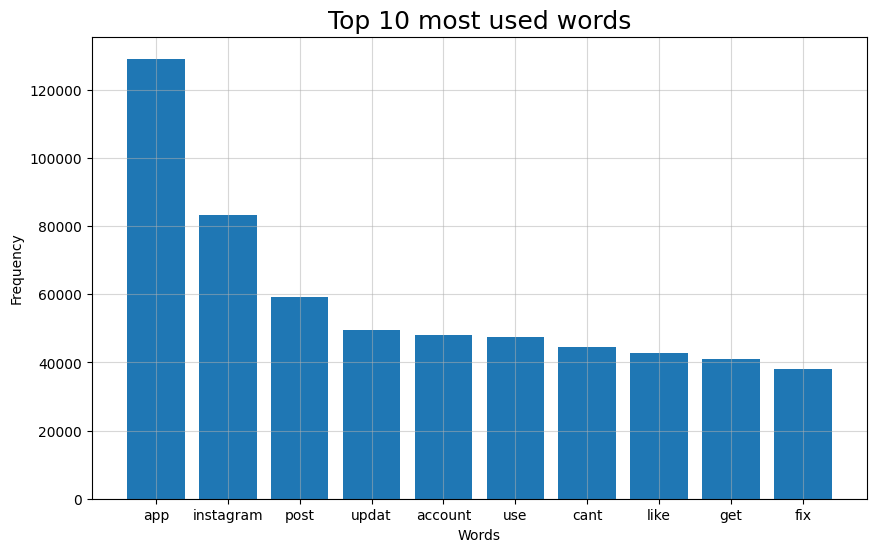

In [34]:
words = []
for text in data['clean_review']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title
plt.title('Top 10 most used words', fontsize = 18)

# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

In [25]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
# Split X and Y
x = np.array(data['clean_review'])
y = np.array(data['rating'])

# Convert text to numerical

cv = CountVectorizer()
X = cv.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
mnb = MultinomialNB()
bnb = BernoulliNB()

mnb.fit(xtrain,ytrain)
bnb.fit(xtrain,ytrain)

BernoulliNB()

In [37]:
pred_mnb = mnb.predict(xtest)
predict_bnb = bnb.predict(xtest)

In [38]:
print(f'Multinomial Accuracy: {accuracy_score(ytest, pred_mnb)}')
print('-' * 55)
print(classification_report(ytest, pred_mnb))

Multinomial Accuracy: 0.5761713647913748
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.61      0.88      0.72     18728
           2       0.23      0.06      0.10      5438
           3       0.26      0.13      0.17      5315
           4       0.37      0.18      0.24      4576
           5       0.67      0.74      0.70      8052

    accuracy                           0.58     42109
   macro avg       0.43      0.40      0.39     42109
weighted avg       0.50      0.58      0.52     42109



In [39]:
print(f'Bernoulli Accuracy: {accuracy_score(ytest, predict_bnb)}')
print('-' * 55)
print(classification_report(ytest, predict_bnb))

Bernoulli Accuracy: 0.5661497542093139
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.61      0.85      0.71     18728
           2       0.25      0.06      0.10      5438
           3       0.27      0.09      0.13      5315
           4       0.35      0.15      0.21      4576
           5       0.58      0.79      0.67      8052

    accuracy                           0.57     42109
   macro avg       0.41      0.39      0.36     42109
weighted avg       0.49      0.57      0.50     42109



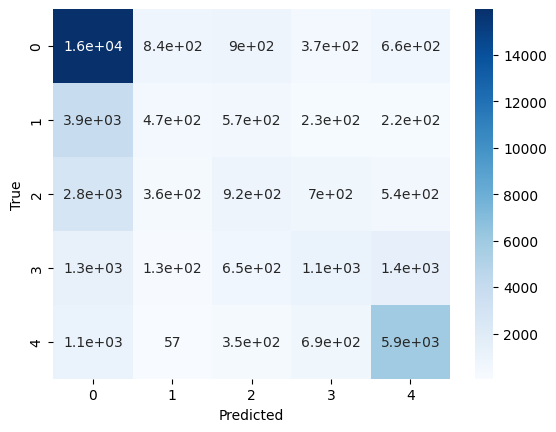

In [33]:
import seaborn as sns
cm = confusion_matrix(ytest, pred_mnb)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
data

,review_description,rating,review_date,clean_review
0,"The app is good for connecting with friends, f...",3,2023-07-11,app good connect friend famili even potenti bu...
1,"Used to be my favorite social media app, but ""...",2,2023-07-22,use favorit social media app improv made harde...
2,Instagram is the best of all the social media....,5,2023-07-25,instagram best social media post platform faci...
3,"I love this app.. but as of late, I have been ...",2,2023-07-09,love app late problem screen background turn w...
4,Used to be a great app but there are so many m...,3,2023-07-17,use great app mani bug issu ever plus ruin use...
...,...,...,...,...
210537,I love the app but lately my dms have been mes...,2,2019-03-10,love app late dms mess bad take send repli don...
210538,Fun and addictive. Let's me see new ideas for ...,5,2019-09-22,fun addict let see new idea craft bunch cool s...
210539,User friendly and all things are available for...,5,2018-10-21,user friend thing avail entertain connect peop...
210540,There are issues when you upload a story from ...,1,2020-06-02,issu upload stori redmi view friend appear cro...


In [40]:
# TF-IDF FEATURE EXTRACTION

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)  # unigrams + bigrams
)

X = tfidf.fit_transform(data['clean_review'])
y = data['rating']


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [42]:
# LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.5967845353724857

Classification Report:

              precision    recall  f1-score   support

           1       0.62      0.92      0.74     18636
           2       0.26      0.04      0.07      5475
           3       0.31      0.13      0.18      5306
           4       0.41      0.24      0.30      4689
           5       0.68      0.75      0.71      8003

    accuracy                           0.60     42109
   macro avg       0.46      0.41      0.40     42109
weighted avg       0.52      0.60      0.53     42109



In [43]:
# SVM MODEL

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5948372081977724

Classification Report:

              precision    recall  f1-score   support

           1       0.62      0.93      0.74     18636
           2       0.26      0.03      0.06      5475
           3       0.33      0.09      0.14      5306
           4       0.40      0.20      0.26      4689
           5       0.65      0.77      0.70      8003

    accuracy                           0.59     42109
   macro avg       0.45      0.40      0.38     42109
weighted avg       0.52      0.59      0.52     42109



In [44]:
# CROSS VALIDATION


from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross Validation Scores: [0.58733287 0.59785319 0.60606061 0.60218961 0.59535005]
Mean CV Accuracy: 0.597757266143893


In [45]:
# GRID SEARCH FOR LOGISTIC REGRESSION


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Test Accuracy After Tuning:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best CV Score: 0.5984219244655503
Test Accuracy After Tuning: 0.5968320311572348


In [46]:
# MODEL COMPARISON 

import pandas as pd
from sklearn.naive_bayes import MultinomialNB

models = {
    "Multinomial NB": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
1,Logistic Regression,0.596785
2,Linear SVM,0.594837
0,Multinomial NB,0.586692


# Here our motive is not of increasing the accuracy but to check how the model is working . 
# Will work in improving the accuracy . stay tuned 